In [1]:
import pandas as pd
from urllib.parse import urlparse

# CSVファイルのパス
csv_file_path = './data/access.csv'
# CSVファイルを読み込む
df = pd.read_csv(csv_file_path)

# URLに指定された文字列を含んでいるかどうか判定する関数
def filter_str(url):
    lower_url = url.lower()
    if 'zanbil.ir' in lower_url or 'znbl.ir' in lower_url or 'zanbil-ir' in lower_url:
        return '-'
    return url
# URLからドメイン名を抽出する関数
def get_domain(url):
    return urlparse(url).netloc if url != '-' else None

# リファラが空白でないデータをフィルタリングし、不要なドメインを除外
df['Referer'] = df['Referer'].dropna().apply(filter_str)
df_filtered = df[df['Referer'] != '-'].dropna()

# リファラからドメイン名を抽出
df_filtered['Referer_Domain'] = df_filtered['Referer'].apply(get_domain)

# リファラの頻度を計算
referer_counts = df_filtered['Referer'].value_counts()
referer_domain_counts = df_filtered['Referer_Domain'].value_counts()

print(len(referer_counts))
print(len(referer_domain_counts))

25848
358


30/25848
Referer_not_Zanbil
http://www.google.com/search?source=hp&ei=ScVIXIGmJITYaIyUrfAF&q=%D8%A8%D8%AE%D8%A7%D8%B1%DB%8C+%D8%AF%DB%8C%D9%88%D8%A7%D8%B1%DB%8C+%D8%A8%D8%A7+%D8%AF%D9%88%D8%AF%DA%A9%D8%B4+%D9%86%DB%8C%DA%A9+%DA%A9%D8%A7%D9%84%D8%A7&oq=%D8%A8%D8%AE%D8%A7%D8%B1%DB%8C+%D8%AF%DB%8C%D9%88%D8%A7%D8%B1%DB%8C+%D8%A8%D8%A7+%D8%AF%D9%88%D8%AF%DA%A9%D8%B4&gs_l=mobile-gws-wiz-hp.1.1.0i19l3j0i22i30i19l2.3364.12833..18909...0.0..0.349.4368.0j11j9j1......0....1.......5..41j0j46j46i275j0i22i30.AjONZ-6YCh4                                                                                                                                                                                                        A
https://www.google.com/search?q=%D8%B4%D9%84+%D8%B4%D8%AF%D9%86+%D8%AF%D8%B3%D8%AA+%DA%86%D9%BE&btnG=                                                                                                                                                                                          

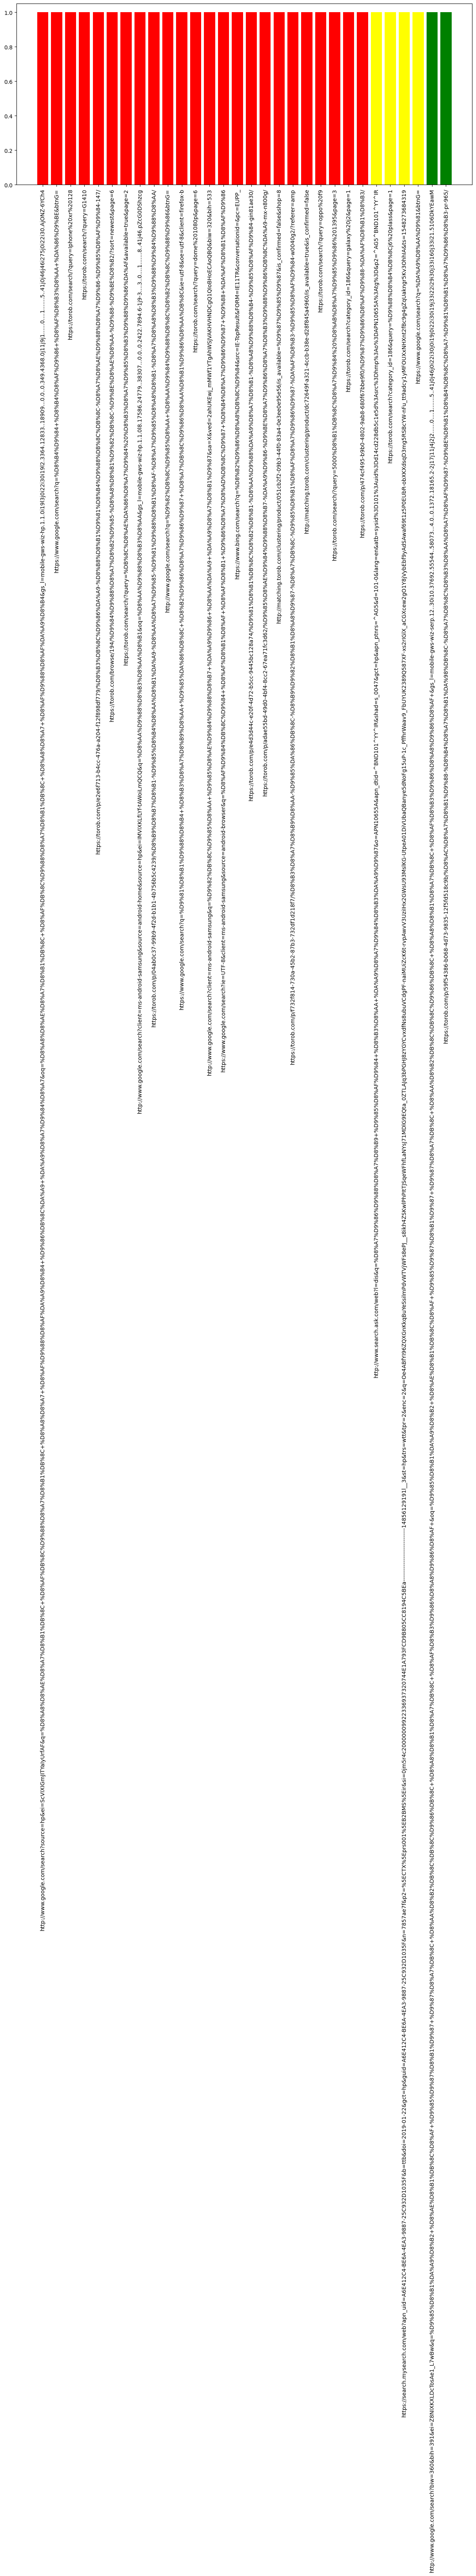

In [3]:

#流入経路
import pandas as pd
import matplotlib.pyplot as plt
import os
# マジックコマンド
%matplotlib inline
df_filtered['Referer_not_Zanbil']=df_filtered[df_filtered['Referer'].apply(filter_str)!='-']['Referer']
referer_not_zanbil_counts = df_filtered['Referer_not_Zanbil'].value_counts()
filter_size=30
print(str(filter_size)+"/"+str(len(referer_not_zanbil_counts)))
referer_counts_top30=referer_not_zanbil_counts.tail(30)
# 頻度の累積比率を計算
cumulative_ratio = referer_counts_top30.cumsum() / referer_counts_top30.sum()

# ABC分析の閾値を設定
A_threshold = 0.8
B_threshold = 0.95

# ABCカテゴリを割り当て
categories = pd.cut(cumulative_ratio, bins=[0, A_threshold, B_threshold, 1], labels=['A', 'B', 'C'])

# 結果を表示
print(categories.tail(30))

# プロットを作成
plt.figure(figsize=(15, 6))
plt.bar(referer_counts_top30.index, referer_counts_top30.values, color=categories.map({'A': 'red', 'B': 'yellow', 'C': 'green'})) # type: ignore
plt.xticks(rotation=90)
plt.show()

In [ ]:

#流入経路ドメイン
import pandas as pd
import matplotlib.pyplot as plt
import os
# マジックコマンド
%matplotlib inline
filter_size=30
print(str(filter_size)+"/"+str(len(referer_domain_counts)))
referer_counts_top30=referer_domain_counts.head(30)
# 頻度の累積比率を計算
cumulative_ratio = referer_counts_top30.cumsum() / referer_counts_top30.sum()

# ABC分析の閾値を設定
A_threshold = 0.8
B_threshold = 0.95

# ABCカテゴリを割り当て
categories = pd.cut(cumulative_ratio, bins=[0, A_threshold, B_threshold, 1], labels=['A', 'B', 'C'])

# 結果を表示
print(categories.head(30))

# プロットを作成
plt.figure(figsize=(15, 6))
plt.bar(referer_counts_top30.index, referer_counts_top30.values, color=categories.map({'A': 'red', 'B': 'yellow', 'C': 'green'})) # type: ignore
plt.xticks(rotation=90)
plt.show()